# <div align="center">CP322-A Mini-Project 1: Machine Learning</div>
## <div align="center">Group 6</div>
### <div align="center">due on 15-Oct-2023 at 11:30 PM</div>

Imports:

In [1]:
import numpy as np
import heapq
from math import sqrt
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import statistics

## Task 1: Acquire, preprocess, and analyze the data

1. Load the datasets into NumPy objects (i.e., arrays or matrices) in Python. Remember to convert the wine dataset
to a binary task, as discussed above.
2. Clean the data. Are there any missing or malformed features? Are there other data oddities that need to be
dealt with? You should remove any examples with missing or malformed features and note this in your
report. For categorical variables, you can use a one-hot encoding.
3. Compute basic statistics on the data to understand it better. E.g., what are the distributions of the positive vs.
negative classes, what are the distributions of some of the numerical features? what are the correlations between
the features? how do the scatter plots of pair-wise features look like for some subset of features?

In [2]:
def readFile(filename):
    
    data = []
    labels = []
    with open(filename, "r") as file:
        for line in file:
            line = line.strip()
            if line:  # Skip empty lines
                row = line.split(",")
                if filename=="data/iris.data":
                    data.append([float(val) for val in row[:-1]])
                    labels.append(row[-1])
                else:
                    data.append(row)

    data = np.array(data)
    if filename == "data/iris.data":
        return np.array(data),np.array(labels)
    else:
        return data
    
class dataAnalysis:
    def __init__(self, data, categories, classifications):
        self.data = data
        self.size = len(data)
        self.categories = categories
        self.classifications = classifications
    def printLabelStats(self):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        Print statistics on every classification in data
        ===================================================================================
        '''
        print("=====================================================")
        print("Classification Analysis:")
        print("=====================================================")
        print(f"Total: {self.size} (%100)")
        
        for label in self.classifications:
            count = len(self.data[self.data[:, -1] == label])
            percentage = round(100*count/self.size,2)
            print(f"Value: {label}, Count: {count}, Percentage: %{percentage}")
            
    def printCategoryStats(self):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        Print statistics on every attribute in data
        ===================================================================================
        '''
        data = self.data
        categories = self.categories
        size = self.size
        labels = column = data[:, -1]
        print("=====================================================")
        print("Attribute Analysis:")
        print("=====================================================")
        for i in range(len(categories)):
            category = categories[i]
            column = data[:, i].astype(float)
            
            avg = np.mean(column)
            med = np.median(column)
            mode = float(stats.mode(column,keepdims=True)[0][0])
            std_dev = np.std(column)
        
            unique_values, counts = np.unique(column, return_counts=True)
            
            print("-----------------------------------------------------")
            print(f"{category.upper()} Analysis:")
            print("-----------------------------------------------------")
            for value, count in zip(unique_values, counts):
                percentage = round(100*count/self.size,2)
                print(f"Value: {value}, Count: {count}, Percentage: %{percentage}")
                
            print(f"\nMean: {avg}")
            print(f"Median: {med}")
            print(f"Mode: {mode}")
            print(f"Standard Deviation: {std_dev}")
            
            plt.figure(figsize=(4, 4))
            plt.bar(labels, column, edgecolor='black')
            plt.xlabel(category)
            plt.ylabel("Output")
            plt.title("Bar Chart of Numeric Data by Labels")
            plt.show()
           

            
            

### Dataset 1 (Ionosphere): 

In [3]:
filename = "data/ionosphere.data"

ionosphere_data = readFile(filename)
X = ionosphere_data[:, :-1]  # All columns except the last one
Y = (ionosphere_data[:, -1] == 'g').astype(bool)   # 1 if the class is 'g', 0 otherwise

positive_count = np.sum(Y == 1)
negative_count = np.sum(Y == 0)

#what are the distributions of the positive vs. negative classes?
print("Distribution of classes:")
print("Positive (g):", positive_count)
print("Negative (b):", negative_count)

print("\nData:")
print(ionosphere_data)

Distribution of classes:
Positive (g): 225
Negative (b): 126

Data:
[['1' '0' '0.99539' ... '0.18641' '-0.45300' 'g']
 ['1' '0' '1' ... '-0.13738' '-0.02447' 'b']
 ['1' '0' '1' ... '0.56045' '-0.38238' 'g']
 ...
 ['1' '0' '0.94701' ... '0.92697' '-0.00577' 'g']
 ['1' '0' '0.90608' ... '0.87403' '-0.16243' 'g']
 ['1' '0' '0.84710' ... '0.85764' '-0.06151' 'g']]


### Dataset 2 (Adult Data Set):

In [4]:
filename = "data/adult.data"
adult_data = readFile(filename)

X = adult_data[:, :-1]  # All columns except the last one
Y = (adult_data[:, -1] == '>50K').astype(int)   # 1 if the class is '>50', 0 otherwise

#what are the distributions of the positive vs. negative classes?

positive_count = np.sum(Y == 1)
negative_count = np.sum(Y == 0)

print("Distribution of classes:")
print("Positive (>50):", positive_count)
print("Negative (<=50):", negative_count)

print("\nData:")
print(adult_data)

#what are the distributions of some of the numerical features?

Distribution of classes:
Positive (>50): 0
Negative (<=50): 32561

Data:
[['39' ' State-gov' ' 77516' ... ' 40' ' United-States' ' <=50K']
 ['50' ' Self-emp-not-inc' ' 83311' ... ' 13' ' United-States' ' <=50K']
 ['38' ' Private' ' 215646' ... ' 40' ' United-States' ' <=50K']
 ...
 ['58' ' Private' ' 151910' ... ' 40' ' United-States' ' <=50K']
 ['22' ' Private' ' 201490' ... ' 20' ' United-States' ' <=50K']
 ['52' ' Self-emp-inc' ' 287927' ... ' 40' ' United-States' ' >50K']]


### Dataset 3 (Iris Data Set):

Classification Analysis:
Total: 150 (%100)
Value: Iris-setosa, Count: 50, Percentage: %33.33
Value: Iris-versicolor, Count: 50, Percentage: %33.33
Value: Iris-virginica, Count: 50, Percentage: %33.33
Attribute Analysis:
-----------------------------------------------------
SEPAL_LENGTH Analysis:
-----------------------------------------------------
Value: 4.3, Count: 1, Percentage: %0.67
Value: 4.4, Count: 3, Percentage: %2.0
Value: 4.5, Count: 1, Percentage: %0.67
Value: 4.6, Count: 4, Percentage: %2.67
Value: 4.7, Count: 2, Percentage: %1.33
Value: 4.8, Count: 5, Percentage: %3.33
Value: 4.9, Count: 6, Percentage: %4.0
Value: 5.0, Count: 10, Percentage: %6.67
Value: 5.1, Count: 9, Percentage: %6.0
Value: 5.2, Count: 4, Percentage: %2.67
Value: 5.3, Count: 1, Percentage: %0.67
Value: 5.4, Count: 6, Percentage: %4.0
Value: 5.5, Count: 7, Percentage: %4.67
Value: 5.6, Count: 6, Percentage: %4.0
Value: 5.7, Count: 8, Percentage: %5.33
Value: 5.8, Count: 7, Percentage: %4.67
Value: 5.9, C

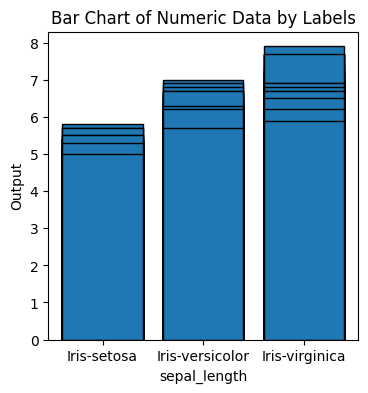

-----------------------------------------------------
SEPAL_WIDTH Analysis:
-----------------------------------------------------
Value: 2.0, Count: 1, Percentage: %0.67
Value: 2.2, Count: 3, Percentage: %2.0
Value: 2.3, Count: 4, Percentage: %2.67
Value: 2.4, Count: 3, Percentage: %2.0
Value: 2.5, Count: 8, Percentage: %5.33
Value: 2.6, Count: 5, Percentage: %3.33
Value: 2.7, Count: 9, Percentage: %6.0
Value: 2.8, Count: 14, Percentage: %9.33
Value: 2.9, Count: 10, Percentage: %6.67
Value: 3.0, Count: 26, Percentage: %17.33
Value: 3.1, Count: 12, Percentage: %8.0
Value: 3.2, Count: 13, Percentage: %8.67
Value: 3.3, Count: 6, Percentage: %4.0
Value: 3.4, Count: 12, Percentage: %8.0
Value: 3.5, Count: 6, Percentage: %4.0
Value: 3.6, Count: 3, Percentage: %2.0
Value: 3.7, Count: 3, Percentage: %2.0
Value: 3.8, Count: 6, Percentage: %4.0
Value: 3.9, Count: 2, Percentage: %1.33
Value: 4.0, Count: 1, Percentage: %0.67
Value: 4.1, Count: 1, Percentage: %0.67
Value: 4.2, Count: 1, Percentage:

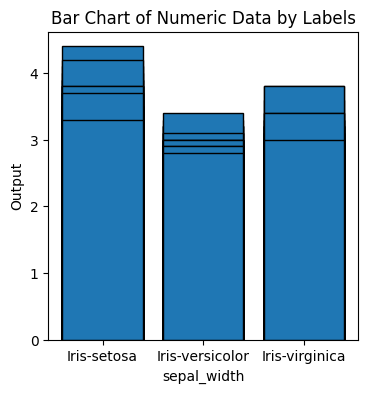

-----------------------------------------------------
PETAL_LENGTH Analysis:
-----------------------------------------------------
Value: 1.0, Count: 1, Percentage: %0.67
Value: 1.1, Count: 1, Percentage: %0.67
Value: 1.2, Count: 2, Percentage: %1.33
Value: 1.3, Count: 7, Percentage: %4.67
Value: 1.4, Count: 12, Percentage: %8.0
Value: 1.5, Count: 14, Percentage: %9.33
Value: 1.6, Count: 7, Percentage: %4.67
Value: 1.7, Count: 4, Percentage: %2.67
Value: 1.9, Count: 2, Percentage: %1.33
Value: 3.0, Count: 1, Percentage: %0.67
Value: 3.3, Count: 2, Percentage: %1.33
Value: 3.5, Count: 2, Percentage: %1.33
Value: 3.6, Count: 1, Percentage: %0.67
Value: 3.7, Count: 1, Percentage: %0.67
Value: 3.8, Count: 1, Percentage: %0.67
Value: 3.9, Count: 3, Percentage: %2.0
Value: 4.0, Count: 5, Percentage: %3.33
Value: 4.1, Count: 3, Percentage: %2.0
Value: 4.2, Count: 4, Percentage: %2.67
Value: 4.3, Count: 2, Percentage: %1.33
Value: 4.4, Count: 4, Percentage: %2.67
Value: 4.5, Count: 8, Percenta

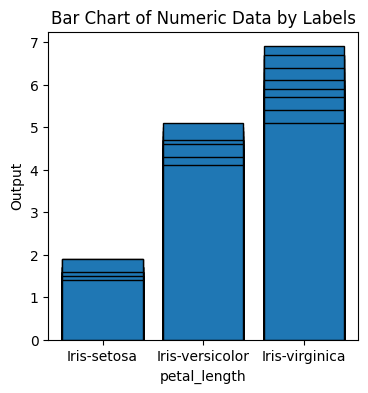

-----------------------------------------------------
PETAL_WIDTH Analysis:
-----------------------------------------------------
Value: 0.1, Count: 6, Percentage: %4.0
Value: 0.2, Count: 28, Percentage: %18.67
Value: 0.3, Count: 7, Percentage: %4.67
Value: 0.4, Count: 7, Percentage: %4.67
Value: 0.5, Count: 1, Percentage: %0.67
Value: 0.6, Count: 1, Percentage: %0.67
Value: 1.0, Count: 7, Percentage: %4.67
Value: 1.1, Count: 3, Percentage: %2.0
Value: 1.2, Count: 5, Percentage: %3.33
Value: 1.3, Count: 13, Percentage: %8.67
Value: 1.4, Count: 8, Percentage: %5.33
Value: 1.5, Count: 12, Percentage: %8.0
Value: 1.6, Count: 4, Percentage: %2.67
Value: 1.7, Count: 2, Percentage: %1.33
Value: 1.8, Count: 12, Percentage: %8.0
Value: 1.9, Count: 5, Percentage: %3.33
Value: 2.0, Count: 6, Percentage: %4.0
Value: 2.1, Count: 6, Percentage: %4.0
Value: 2.2, Count: 3, Percentage: %2.0
Value: 2.3, Count: 8, Percentage: %5.33
Value: 2.4, Count: 3, Percentage: %2.0
Value: 2.5, Count: 3, Percentage:

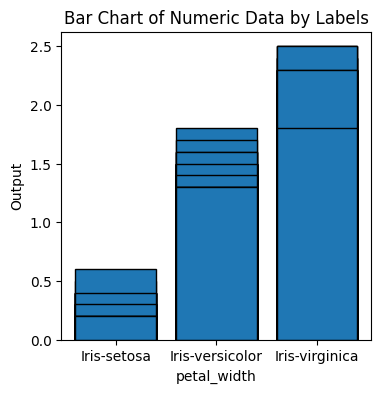

In [5]:
filename = "data/iris.data"
iris_data, iris_labels = readFile(filename)

# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class: 
#   -- Iris Setosa
#   -- Iris Versicolour
#   -- Iris Virginica

categories = ['sepal_length','sepal_width','petal_length','petal_width']
classifications = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris_labels = iris_labels.reshape(-1, 1)

new_iris_data = np.hstack((iris_data, iris_labels))
# print(new_iris_data)

irisAnalysis = dataAnalysis(new_iris_data,categories,classifications)
irisAnalysis.printLabelStats()
irisAnalysis.printCategoryStats()

# print(iris_labels)

### Dataset 4 (Car Evaluation):

Classification Analysis:
Total: 1728 (%100)
Value: unacc, Count: 1210, Percentage: %70.02
Value: acc, Count: 384, Percentage: %22.22
Value: good, Count: 69, Percentage: %3.99
Value: vgood, Count: 65, Percentage: %3.76
Attribute Analysis:
-----------------------------------------------------
BUYING Analysis:
-----------------------------------------------------
Value: 0.0, Count: 432, Percentage: %25.0
Value: 1.0, Count: 432, Percentage: %25.0
Value: 2.0, Count: 432, Percentage: %25.0
Value: 3.0, Count: 432, Percentage: %25.0

Mean: 1.5
Median: 1.5
Mode: 0.0
Standard Deviation: 1.118033988749895


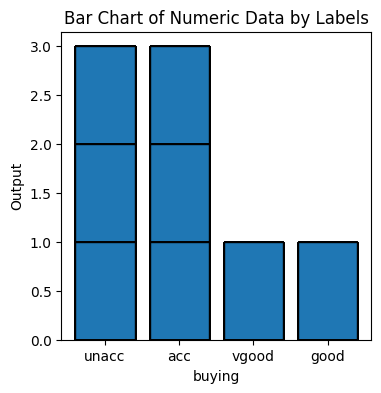

-----------------------------------------------------
MAINT Analysis:
-----------------------------------------------------
Value: 0.0, Count: 432, Percentage: %25.0
Value: 1.0, Count: 432, Percentage: %25.0
Value: 2.0, Count: 432, Percentage: %25.0
Value: 3.0, Count: 432, Percentage: %25.0

Mean: 1.5
Median: 1.5
Mode: 0.0
Standard Deviation: 1.118033988749895


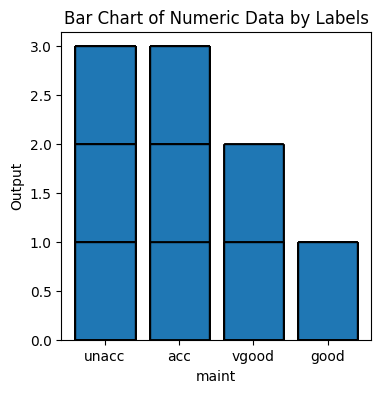

-----------------------------------------------------
DOORS Analysis:
-----------------------------------------------------
Value: 2.0, Count: 432, Percentage: %25.0
Value: 3.0, Count: 432, Percentage: %25.0
Value: 4.0, Count: 432, Percentage: %25.0
Value: 5.0, Count: 432, Percentage: %25.0

Mean: 3.5
Median: 3.5
Mode: 2.0
Standard Deviation: 1.118033988749895


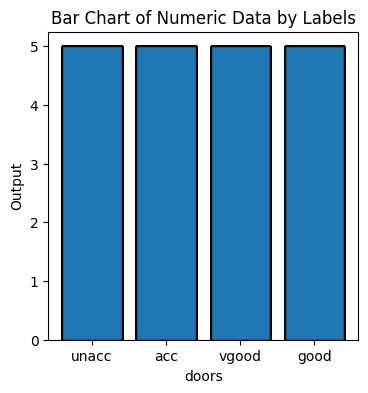

-----------------------------------------------------
PERSONS Analysis:
-----------------------------------------------------
Value: 2.0, Count: 576, Percentage: %33.33
Value: 4.0, Count: 576, Percentage: %33.33
Value: 5.0, Count: 576, Percentage: %33.33

Mean: 3.6666666666666665
Median: 4.0
Mode: 2.0
Standard Deviation: 1.247219128924647


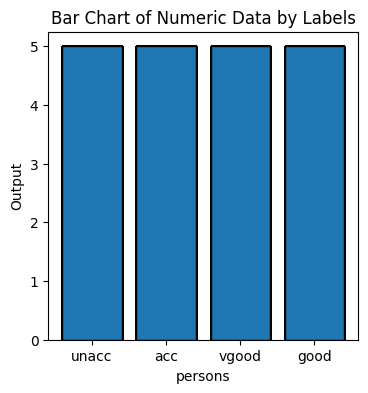

-----------------------------------------------------
LUG_BOOT Analysis:
-----------------------------------------------------
Value: 0.0, Count: 576, Percentage: %33.33
Value: 1.0, Count: 576, Percentage: %33.33
Value: 2.0, Count: 576, Percentage: %33.33

Mean: 1.0
Median: 1.0
Mode: 0.0
Standard Deviation: 0.816496580927726


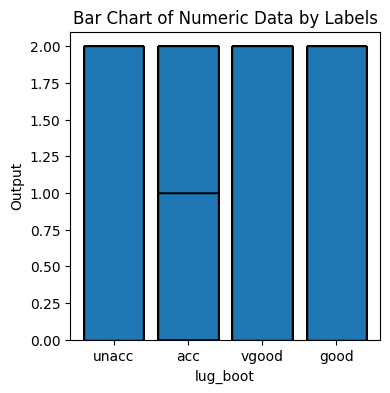

-----------------------------------------------------
SAFETY Analysis:
-----------------------------------------------------
Value: 0.0, Count: 576, Percentage: %33.33
Value: 1.0, Count: 576, Percentage: %33.33
Value: 2.0, Count: 576, Percentage: %33.33

Mean: 1.0
Median: 1.0
Mode: 0.0
Standard Deviation: 0.816496580927726


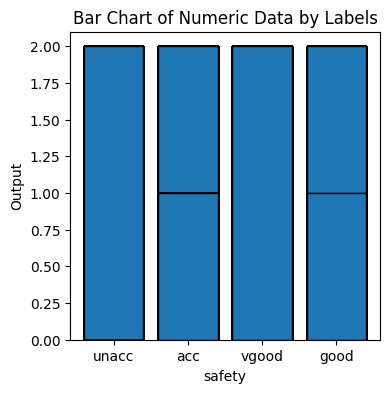

In [6]:
filename = "data/car.data"
cars_data = readFile(filename)

# car acceptability
# . PRICE                  overall price (x3) 
# . . buying               buying price (x2) index 0
# . . maint                price of the maintenance (x2) index 1
# . TECH                   technical characteristics (x3) 
# . . COMFORT              comfort (x2) 
# . . . doors              number of doors (x1) index 2 
# . . . persons            capacity in terms of persons to carry (x1) index 3
# . . . lug_boot           the size of luggage boot (x1) index 4
# . . safety               estimated safety of the car (x2) index 5
# and classification is index 7
 
categories = ['buying','maint','doors','persons','lug_boot','safety']
classifications = ['unacc', 'acc', 'good','vgood']
#=====================================================
#Refactor Data
#=====================================================
outputs1 = ['low' ,'med', 'high', 'vhigh']
outputs2 = ['small' ,'med', 'big']
for i in range(len(outputs1)):   
    cars_data[cars_data == outputs1[i]] = i
    
for i in range(len(outputs2)):   
    cars_data[cars_data == outputs2[i]] = i
    
cars_data[cars_data == "5more"] = 5
cars_data[cars_data == "more"] = 5
#=====================================================
#Analyze Data
#=====================================================
carAnalysis = dataAnalysis(cars_data,categories,classifications)
carAnalysis.printLabelStats()
carAnalysis.printCategoryStats()


## Task 2: Implement the models

#### 1. Implement logistic regression, and use (full batch) gradient descent for optimization.
#### 2. Implement k-Nearest Neighbor (KNN), and find the best K.

Implement both models as Python classes. You should use the constructor for the class to initialize the model
parameters as attributes, as well as to define other important properties of the model.
• Each of your models’ classes should have (at least) two functions:
– Define a fit function, which takes the training data (i.e., x and y)—as well as other hyperparameters (e.g.,
the learning rate and/or number of gradient descent iterations)—as input. This function should train your
model by modifying the model parameters.
– Define a predict function, which takes a set of input points (i.e., x) as input and outputs predictions (i.e.,
yˆ) for these points. Note that for linear regression you need to convert probabilities to binary 0-1
predictions by thresholding the output at 0.5!
In addition to the model classes, you should also define functions evaluate_acc to evaluate the model accuracy.
This function should take the true labels (i.e., y), and target labels (i.e., yˆ) as input, and it should output the accuracy
score.
• Lastly, you should implement a script to run k-fold cross-validation

### Logistic Regression:

In [7]:
class logistic_regression:
    def __init__(self):
        self.threshold = 0.5
        self.convergence = 0.01
        return None
    
    def fit(self, x,y,alpha,iterations):
        m = len(x)
        w = 0
        b = 0

        while self.convergence < self.J(w,b,m,x,y)- self.mse:
            tmp_w = w - alpha*self.J(w,b,m,x,y)
            tmp_b = b - alpha*self.J(w,b,m,x,y)

            w = tmp_w
            b = tmp_b
        
        return None

    def predict(self, x):
        return None

    def evaluate_acc(self, y, y_ex):
        return None

    def mse(self, m, w, b, x, y):
        val = 0

        for i in range(m):
            val += (b + (w*x[i]) - y[i])**2

        return val

    def J(self, w, b, m, x, y):
        return (1/2*m)*self.mse(m,w,b,x,y)

### K-Nearest Neighbor (KNN):
Riley and Torin

In [8]:
# 1) a new data point is input that we need to classify
# 2) check the classification of the k nearest elements
# 3) assunming we have 2 unique classifications (a,b). we take the classification of the dominant group
# 4) if a tie exists take the class with the shortest distance from 

#to calculate distance we can use the Euclidean distance formula sqrt(sum i to N (x1_i — x2_i)²)


class kNN:
    def __init__(self, k, dist_metric="euclidean"):     
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        initialize kNN model
        ===================================================================================
        PARAMETERS:
        ===================================================================================
        * self (kNN): 
        ----------------------------------------
        kNN model to define k values, training data, and distance metric
        ----------------------------------------
        * k (int):
        ----------------------------------------
        integer representing number of neighbours to compare to
        ----------------------------------------
        * dist_metric (string):
        ----------------------------------------
        string representing distance metric formula to follow
        ===================================================================================
        '''
        self.k = k #num of neighbours
        self.dist_metric = dist_metric #equation to calculate distance with
        self.train_data = None #initialize using fit method
        self.train_labels = None
        
    def fit(self, data, labels):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        set train_data and train_labelsby loading in Train data used to compare new data
        ===================================================================================
        PARAMETERS:
        ===================================================================================
        * data[] (NumPy Array): 
        ----------------------------------------
        list of data with labels seperated
        ----------------------------------------
        * labels (NumPy Array):
        ----------------------------------------
        list of labels with data removed
        ===================================================================================
        '''
        self.train_data = data
        self.train_labels = labels

    def predict(self, new_data):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        given new data, compare its items to the k closest elements of training data based 
        on a set distance metric and predict the datas classification.
        ===================================================================================
        PARAMETERS:
        ===================================================================================
        * self (kNN): 
        ----------------------------------------
        kNN model with predefined k values, training data, and distance metric
        ----------------------------------------
        * new_data (NumPy Array):
        ----------------------------------------
        Array of new data to predict classifications for
        ===================================================================================
        RETURNS:
        ===================================================================================
        * predictions (List):
        ----------------------------------------
        list of labels for each item in new_data
        ===================================================================================
        '''
        predictions = []#return array of predicted classifications, for each row in new_data
        for new_row in new_data:
            # calculate distances between new data and training data                   
            k_neighbours = self.__neighbours(new_row) #determine the k nearest neighbours using preffered distance metric
            classifications = []#for the given neighbors check their label
            distances = [] #for tiebreak if need be
            for result in k_neighbours:
                #print(f"new = {new_row}: train = {result[2]}")
                i = result[1]#results formatted [row, index of row], so take the index to find the associated label
                dist = result[0]
                classifications.append(self.train_labels[i])#add label at index i
                distances.append(dist)

            
            #check for ties in classifications here
            # thinking is use multimode to check for classification ties, to know then we need to check lowest distance 
            classifications_mode = statistics.multimode(classifications)
            #print(classifications_mode)
            #print(distances)

            if len(classifications_mode) > 1: #i.e we have a tie
                #go over distances, and get the lowest average and append that to predictions
                #print(classifications_mode)
                #make an array of size len(classifications) to store distances
                distances_mode = [0.0] * len(classifications_mode)
                #print(distances_mode, len(distances_mode), len(classifications_mode))
                #if label from classifications is in modes, add the distance to the appropriate index in the distances array
                classification_index = 0
                for classification in classifications:
                    if classification in classifications_mode: #if the classification is part of the multimode
                        #get the proper index for the distance array for that 
                        distance_index = classifications_mode.index(classification)
                        #print(distance_index)
                        #print(distances_mode)
                        distances_mode[distance_index] += distances[classification_index] #increase the correct distance by the distance of the classification

                    classification_index += 1

                #print(distances)
                #print(distances_mode)
                #choose the minimum distance label and append to predictions
                min_distance = min(distances_mode)

                min_distance_index = distances_mode.index(min_distance)
                #print(min_distance_index)
                min_classification = classifications_mode[min_distance_index]

                #print("The label with the minimum distance to neighbors is:", min_classification, "with distance:", min_distance)

                predictions.append(min_classification)

            else:
                predictions.append(str(max(classifications, key=classifications.count))) #from collections import Counter
        
        return predictions
    
    def __calc_distance(self,newRow, trainRow):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        Private Function used in self.__neighbours(). Given a row from new data, calculate 
        the distance based on a set metric from a row in Train data
        ===================================================================================
        PARAMETERS:
        ===================================================================================
        * self (kNN): 
        ----------------------------------------
        kNN model with predefined k values, training data, and distance metric
        ----------------------------------------
        * newRow[] (List of data points (float/int)):
        ----------------------------------------
        data row to compare distance from train row data 
        ----------------------------------------
        * trainRow[] (List of data points (float/int)):
        ----------------------------------------
        data row to compare distance with test data
        ===================================================================================
        RETURNS:
        ===================================================================================
        * distance (float):
        ----------------------------------------
        float distance between to rows of data
        ===================================================================================
        '''
        distance = 0
        if self.dist_metric == "euclidean":
            for i in range(len(newRow)):
                squared = pow(newRow[i] - trainRow[i],2)
                distance += squared
            distance = sqrt(distance)
        return(distance)

    def __neighbours(self, new_row):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        private function used in self.predict(). Given a row from new data, return k number
        of neigbours based on distance
        ===================================================================================
        PARAMETERS:
        ===================================================================================
        * self (kNN): 
        ----------------------------------------
        kNN model with predefined k values, training data, and distance metric
        ----------------------------------------
        * newRow[] (List of data points (float/int)):
        ----------------------------------------
        data row to compare distance from train row data 
        ----------------------------------------
        * trainRow[] (List of data points (float/int)):
        ----------------------------------------
        data row to compare distance with test data
        ===================================================================================
        RETURNS:
        ===================================================================================
        * k_neighbours (List):
        ----------------------------------------
        list of k closest neighbours based on distance metric
        ===================================================================================
        '''
        distances = []#heap array
        #for every row of data
        for index in range(len(self.train_data)):#use index to return that value later
            train_row = self.train_data[index]#current row of train data
            dist = self.__calc_distance(new_row, train_row)#calculate distance between new row and train data row
            heapq.heappush(distances, [-dist, index, list(train_row)])#make negative value temporarily to assure we have smallest values 
            if len(distances) > self.k:#past k values remove largest from heap
                heapq.heappop(distances)
        
        k_neighbours = [[-dist, index, train_row] for dist, index, train_row in sorted(distances)]#make positive values, only 5 smallest remain

        return k_neighbours
    
    def testTrainSplit(self, data, testSplit=0.7):
        '''
        ===================================================================================
        DESCRIPTION: 
        ===================================================================================
        Used externally to split data into test and train data. probably remove later
        ===================================================================================
        PARAMETERS:
        ===================================================================================
        * self (kNN): [not used]
        ----------------------------------------
        kNN model with predefined k values, training data, and distance metric
        ----------------------------------------
        * data (NumPy Array):
        ----------------------------------------
        data imported for assignment
        ----------------------------------------
        * testSplit (float):
        ----------------------------------------
        ratio of data to be used for testing, default 70/30 split
        ===================================================================================
        RETURNS:
        ===================================================================================
        * dataSplit (tuple(List1,List2)):
        ----------------------------------------
        a tuple of 2 lists where list 1 contains training data and training labels,
        similarily list 2 contains test data and tes labels
        ===================================================================================
        '''
        split = int(len(data) * testSplit )
        #Split train data (70% standard)
        train_data = data[:split, :-1].astype(float)#data only 
        train_labels = data[:split, -1]#classifications only
        
        #Split test data (30% standard)
        test_data = data[split:, :-1].astype(float)#data only
        test_labels = data[split:, -1]#classifications only
        
        dataSplit = ([train_data, train_labels], [test_data, test_labels])
        
        return(dataSplit)



In [9]:
# model1 = kNN(6)
# train,test = model1.testTrainSplit(ionosphere_data)
# model1.fit(train[0],train[1])
# predictions = model1.predict(test[0])

# model2 = kNN(5)
# train,test = model2.testTrainSplit(adult_data)
# model2.fit(train[0],train[1])
# predictions = model2.predict(test[0])

model3 = kNN(4)
train,test = model3.testTrainSplit(new_iris_data)
model3.fit(train[0],train[1])
predictions = model3.predict(test[0])

# model4 = kNN(3)
# train,test = model4.testTrainSplit(cars_data)
# model.fit(train[0],train[1])
# predictions = model4.predict(test[0])

print(predictions)

['Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor']


In [10]:
def evaluate_acc(predictions, test_labels):
    total = len(predictions)
    hits = 0
    
    for i in range(total):
        if predictions[i] == test_labels[i]:
            hits += 1
#         print(f"guess:{predictions[i]}|answer:{test_labels[i]}")
            
    return hits/total
print(evaluate_acc(predictions,test[1]))

0.6222222222222222


## Task 3: Run Experiments

The goal of this project is to have you explore linear classification and compare different features and models. Use
5-fold cross-validation to estimate performance in all of the experiments. Evaluate the performance using accuracy.
You are welcome to perform any experiments and analyses you see fit (e.g., to compare different features), but at a
minimum, you must complete the following experiments in the order stated below:

#### 1. Compare the accuracy of k-nearest neighbor and logistic regression on the four datasets.

#### 2. Test different k values for the k-nearest neighbor to find the best k-value by showing the accuracy plot. 

#### 3. Test different learning rates for gradient descent applied to logistic regression. Use a threshold for change in the value of the cost function as termination criteria and plot the accuracy on the train/validation set as a function of iterations of gradient descent.

#### 4. Compare the accuracy of the two models as a function of the size of the dataset (by controlling the training size)

Note: The above experiments are the minimum requirements that you must complete; however, this project is open-ended. For example, you might investigate different stopping criteria for gradient descent in logistic regression and develop an automated approach to select a good subset of features. You do not need to do all of these things, but you should demonstrate creativity, rigor, and an understanding of the course material in how you run your chosen experiments and how you report on them in your write-up.

In [11]:
## Testing KNN logic w/ Dataset 1
# Just arbitrairly choosing k = 5 to start, and 70/30 training/test data distribution

len_training_data = int( len(ionosphere_data) * 0.7 )
print("Length of training data set:", len_training_data)
ionosphere_train = ionosphere_data[:len_training_data] # 0 to length of training data
ionosphere_test = ionosphere_data[len_training_data+1:] # should grab everything after what we want as training data

iono_knn = knn(5, ionosphere_train, ionosphere_test)
print("5 Nearest Neighbours for Ionosphere Data:")
print(iono_knn)

Length of training data set: 245


NameError: name 'knn' is not defined